In [1]:
from model.yolo_model import YOLO
from demo import process_image, get_classes, draw
import time
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
image_name = 'dog.jpg'
model = YOLO('data/yolov3-416.h5', 0.6, 0.5)
all_classes = get_classes('data/coco_classes.txt')
image = cv2.imread('images/test/'+image_name)

/home/paprikar/.local/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
pimage = process_image(image)
times = [[], [], []]
for i in range(10):
    boxes, classes, scores, timings = model.predict(pimage, image.shape)
    times[0].append(timings[0])
    times[1].append(timings[1])
    times[2].append(timings[2])

In [4]:
print('Avg predict time: {:.10f}'.format(sum(times[0][5:])/(len(times[0])-5)))
print('Avg calc time: {:.10f}'.format(sum(times[1][5:])/(len(times[1])-5)))
print('Avg total time: {:.10f}'.format(sum(times[2][5:])/(len(times[2])-5)))
print('Detected {} objects'.format(len(boxes)))

Avg predict time: 0.6187338352
Avg calc time: 0.0229890823
Avg total time: 0.6417229176
Detected 3 objects


class: dog, score: 1.00
box coordinate x,y,w,h: [124.10224915 220.40345764 195.3303566  321.81818852]
class: bicycle, score: 1.00
box coordinate x,y,w,h: [119.2545433  118.6414175  448.43396759 321.71520853]
class: truck, score: 0.91
box coordinate x,y,w,h: [468.48298645  84.54924488 227.57073036  83.44933336]



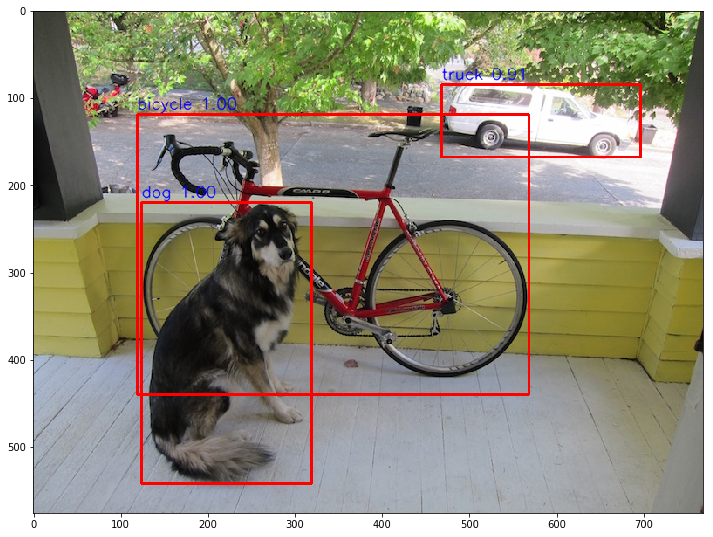

In [5]:
if boxes is not None:
    plt.figure(figsize=(12,12))
    image = draw(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), boxes, scores, classes, all_classes)
    cv2.imwrite('images/res/'+image_name, image)
    plt.imshow(image)